In [66]:
import pandas as pd
import numpy as np
import hts

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [67]:
# load the data
df = pd.read_csv("data/tourism.csv") \
       .drop(columns=["Unnamed: 0"])

# lowercase the column names
df.columns = [col_name.lower() for col_name in df.columns]

# sum the trips over purpose
df = df.groupby(["quarter", "region", "state"])["trips"] \
       .sum() \
       .reset_index(drop=False)

# cleanup region name
df["region"] = df["region"].apply(lambda x: x.replace(" ", "_").replace("'", ""))

# map the full state names to abbreviations
mapping_dict = {
    "New South Wales": "NSW",
    "Northern Territory": "NT",
    "Queensland": "QLD",
    "South Australia": "SA",
    "Victoria": "VIC",
    "Western Australia": "WA",
    "ACT": "ACT",
}

df["state"] = df["state"].map(mapping_dict)

# create the bottom level id
df["state_region"] = df.apply(lambda x: f"{x['state']}_{x['region']}", axis=1)

df.head()


,quarter,region,state,trips,state_region
0,1998-01-01,Adelaide,SA,658.553895,SA_Adelaide
1,1998-01-01,Adelaide_Hills,SA,9.798630,SA_Adelaide_Hills
2,1998-01-01,Alice_Springs,NT,20.207638,NT_Alice_Springs
3,1998-01-01,Australias_Coral_Coast,WA,132.516409,WA_Australias_Coral_Coast
4,1998-01-01,Australias_Golden_Outback,WA,161.726948,WA_Australias_Golden_Outback


In [68]:
# inspect all the regions per state
df.groupby("state")["region"].apply(set).to_frame().reset_index()

,state,region
0,ACT,{Canberra}
1,NSW,"{Central_Coast, New_England_North_West, Snowy_..."
2,NT,"{Launceston,_Tamar_and_the_North, Kakadu_Arnhe..."
3,QLD,"{Central_Queensland, Outback, Bundaberg, Brisb..."
4,SA,"{Barossa, Adelaide, Clare_Valley, Flinders_Ran..."
5,VIC,"{Geelong, High_Country, Central_Highlands, Ben..."
6,WA,"{Experience_Perth, Australias_Golden_Outback, ..."


In [69]:
# create the bottom level df
df_bottom_level = df.pivot(index="quarter", columns="state_region", values="trips")
df_bottom_level

state_region,ACT_Canberra,NSW_Blue_Mountains,NSW_Capital_Country,NSW_Central_Coast,NSW_Central_NSW,NSW_Hunter,NSW_New_England_North_West,NSW_North_Coast_NSW,NSW_Outback_NSW,NSW_Riverina,...,VIC_Spa_Country,VIC_Upper_Yarra,VIC_Western,VIC_Western_Grampians,VIC_Wimmera,WA_Australias_Coral_Coast,WA_Australias_Golden_Outback,WA_Australias_North_West,WA_Australias_South_West,WA_Experience_Perth
quarter,,,,,,,,,,,,,,,,,,,,,
1998-01-01,551.001921,195.543180,261.808142,455.166849,424.395446,674.978457,329.838506,1342.301230,96.602651,215.268912,...,86.196006,102.791022,739.350975,86.996591,18.804743,132.516409,161.726948,120.775450,474.858729,751.211958
1998-04-01,416.025623,200.408671,238.600029,343.476758,557.011571,791.887234,328.366005,1161.108602,120.648446,336.094921,...,74.356890,74.855136,359.626051,84.939977,52.482311,172.615378,164.973780,158.404387,411.622281,668.710707
1998-07-01,436.029011,253.359689,184.423752,303.670875,555.527970,566.040599,324.859168,839.368066,110.073779,228.065371,...,60.778546,59.465405,342.321758,79.974884,35.657551,173.904335,206.879934,184.619035,360.039657,662.850731
1998-10-01,449.798445,245.573846,229.088938,331.817060,590.158435,591.568947,279.796195,1183.859971,185.470023,201.123526,...,46.013284,35.238855,445.968992,116.235617,27.204455,207.002571,198.509591,138.878263,462.620050,832.706514
1999-01-01,378.572817,290.484124,252.281951,466.815571,480.129260,785.102775,327.491877,1306.877508,78.363807,200.822443,...,65.299169,67.823457,607.808299,101.765635,50.219851,198.856638,140.213443,103.337122,562.974629,830.305740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-01,542.769655,203.906222,369.513080,364.288154,512.524298,821.778303,333.112869,1213.745435,95.876016,208.726401,...,86.963114,73.761141,531.783733,55.707346,40.190952,217.657957,211.428114,367.652262,647.774842,937.578580
2016-01-01,626.640631,239.080990,303.226820,412.911330,503.693601,858.614110,315.795461,1624.141691,60.299009,243.643135,...,95.839407,38.611450,723.103235,100.075778,46.144294,274.923899,261.694135,207.329007,967.389399,1086.068326
2016-04-01,592.608499,303.558354,322.504718,250.955972,461.043217,829.977102,392.017225,1153.697747,134.831251,279.953218,...,82.168945,63.697508,401.272195,49.527482,24.402157,279.911249,288.976805,289.814315,650.119716,960.572196


In [70]:
# create the middle level df
df_middle_level = df.groupby(["quarter", "state"])["trips"] \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="quarter", columns="state", values="trips")
df_middle_level

state,ACT,NSW,NT,QLD,SA,VIC,WA
quarter,,,,,,,
1998-01-01,551.001921,8039.794795,1914.709878,4042.779858,1732.743704,6010.424491,1641.089495
1998-04-01,416.025623,7166.013805,1541.405790,3967.069714,1394.638319,4795.246755,1576.326534
1998-07-01,436.029011,6747.935790,1321.819326,4598.548477,1213.330723,4316.845170,1588.293692
1998-10-01,449.798445,7282.082371,1439.406267,4207.772812,1449.354514,4674.829118,1839.716990
1999-01-01,378.572817,7584.776839,1830.389536,4332.490850,1535.459593,5304.334195,1835.687573
...,...,...,...,...,...,...,...
2015-10-01,542.769655,7865.399385,2087.124892,5368.858427,1695.622429,5817.562633,2382.091755
2016-01-01,626.640631,8407.366451,2114.266717,5095.546237,1874.771647,6576.363923,2797.404767
2016-04-01,592.608499,7660.579621,1628.593948,5444.312492,1661.079180,5335.229737,2469.394281


In [71]:
# create the total level df
df_total = df.groupby("quarter")["trips"] \
             .sum() \
             .to_frame() \
             .rename(columns={"trips": "total"})
df_total

,total
quarter,
1998-01-01,23932.544141
1998-04-01,20856.726540
1998-07-01,20222.802189
1998-10-01,21342.960517
1999-01-01,22801.711403
...,...
2015-10-01,25759.429177
2016-01-01,27492.360374
2016-04-01,24791.797758


In [72]:
# join the DataFrames
hierarchy_df = df_bottom_level.join(df_middle_level) \
                              .join(df_total)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)
hierarchy_df = hierarchy_df.resample("QS").sum()
hierarchy_df

,ACT_Canberra,NSW_Blue_Mountains,NSW_Capital_Country,NSW_Central_Coast,NSW_Central_NSW,NSW_Hunter,NSW_New_England_North_West,NSW_North_Coast_NSW,NSW_Outback_NSW,NSW_Riverina,...,WA_Australias_South_West,WA_Experience_Perth,ACT,NSW,NT,QLD,SA,VIC,WA,total
quarter,,,,,,,,,,,,,,,,,,,,,
1998-01-01,551.001921,195.543180,261.808142,455.166849,424.395446,674.978457,329.838506,1342.301230,96.602651,215.268912,...,474.858729,751.211958,551.001921,8039.794795,1914.709878,4042.779858,1732.743704,6010.424491,1641.089495,23932.544141
1998-04-01,416.025623,200.408671,238.600029,343.476758,557.011571,791.887234,328.366005,1161.108602,120.648446,336.094921,...,411.622281,668.710707,416.025623,7166.013805,1541.405790,3967.069714,1394.638319,4795.246755,1576.326534,20856.726540
1998-07-01,436.029011,253.359689,184.423752,303.670875,555.527970,566.040599,324.859168,839.368066,110.073779,228.065371,...,360.039657,662.850731,436.029011,6747.935790,1321.819326,4598.548477,1213.330723,4316.845170,1588.293692,20222.802189
1998-10-01,449.798445,245.573846,229.088938,331.817060,590.158435,591.568947,279.796195,1183.859971,185.470023,201.123526,...,462.620050,832.706514,449.798445,7282.082371,1439.406267,4207.772812,1449.354514,4674.829118,1839.716990,21342.960517
1999-01-01,378.572817,290.484124,252.281951,466.815571,480.129260,785.102775,327.491877,1306.877508,78.363807,200.822443,...,562.974629,830.305740,378.572817,7584.776839,1830.389536,4332.490850,1535.459593,5304.334195,1835.687573,22801.711403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-01,542.769655,203.906222,369.513080,364.288154,512.524298,821.778303,333.112869,1213.745435,95.876016,208.726401,...,647.774842,937.578580,542.769655,7865.399385,2087.124892,5368.858427,1695.622429,5817.562633,2382.091755,25759.429177
2016-01-01,626.640631,239.080990,303.226820,412.911330,503.693601,858.614110,315.795461,1624.141691,60.299009,243.643135,...,967.389399,1086.068326,626.640631,8407.366451,2114.266717,5095.546237,1874.771647,6576.363923,2797.404767,27492.360374
2016-04-01,592.608499,303.558354,322.504718,250.955972,461.043217,829.977102,392.017225,1153.697747,134.831251,279.953218,...,650.119716,960.572196,592.608499,7660.579621,1628.593948,5444.312492,1661.079180,5335.229737,2469.394281,24791.797758


In [73]:
states = df["state"].unique()
regions = df["state_region"].unique()

total = {'total': list(states)}
state = {k: [v for v in regions if v.startswith(k)] for k in states}
hierarchy = {**total, **state}

hierarchy

{'total': ['SA', 'NT', 'WA', 'VIC', 'NSW', 'QLD', 'ACT'],
 'SA': ['SA_Adelaide',
  'SA_Adelaide_Hills',
  'SA_Barossa',
  'SA_Clare_Valley',
  'SA_Eyre_Peninsula',
  'SA_Fleurieu_Peninsula',
  'SA_Flinders_Ranges_and_Outback',
  'SA_Kangaroo_Island',
  'SA_Limestone_Coast',
  'SA_Murraylands',
  'SA_Riverland',
  'SA_Yorke_Peninsula'],
 'NT': ['NT_Alice_Springs',
  'NT_Barkly',
  'NT_Darwin',
  'NT_East_Coast',
  'NT_Hobart_and_the_South',
  'NT_Kakadu_Arnhem',
  'NT_Katherine_Daly',
  'NT_Lasseter',
  'NT_Launceston,_Tamar_and_the_North',
  'NT_MacDonnell',
  'NT_North_West',
  'NT_Tasmania',
  'NT_Wilderness_West'],
 'WA': ['WA_Australias_Coral_Coast',
  'WA_Australias_Golden_Outback',
  'WA_Australias_North_West',
  'WA_Australias_South_West',
  'WA_Experience_Perth'],
 'VIC': ['VIC_Ballarat',
  'VIC_Bendigo_Loddon',
  'VIC_Central_Highlands',
  'VIC_Central_Murray',
  'VIC_Geelong',
  'VIC_Gippsland',
  'VIC_Goulburn',
  'VIC_High_Country',
  'VIC_Lakes',
  'VIC_Macedon',
  'VIC_Ma

In [74]:
from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df)
ht

- total
   |- SA
   |  |- SA_Adelaide
   |  |- SA_Adelaide_Hills
   |  |- SA_Barossa
   |  |- SA_Clare_Valley
   |  |- SA_Eyre_Peninsula
   |  |- SA_Fleurieu_Peninsula
   |  |- SA_Flinders_Ranges_and_Outback
   |  |- SA_Kangaroo_Island
   |  |- SA_Limestone_Coast
   |  |- SA_Murraylands
   |  |- SA_Riverland
   |  - SA_Yorke_Peninsula
   |- NT
   |  |- NT_Alice_Springs
   |  |- NT_Barkly
   |  |- NT_Darwin
   |  |- NT_East_Coast
   |  |- NT_Hobart_and_the_South
   |  |- NT_Kakadu_Arnhem
   |  |- NT_Katherine_Daly
   |  |- NT_Lasseter
   |  |- NT_Launceston,_Tamar_and_the_North
   |  |- NT_MacDonnell
   |  |- NT_North_West
   |  |- NT_Tasmania
   |  - NT_Wilderness_West
   |- WA
   |  |- WA_Australias_Coral_Coast
   |  |- WA_Australias_Golden_Outback
   |  |- WA_Australias_North_West
   |  |- WA_Australias_South_West
   |  - WA_Experience_Perth
   |- VIC
   |  |- VIC_Ballarat
   |  |- VIC_Bendigo_Loddon
   |  |- VIC_Central_Highlands
   |  |- VIC_Central_Murray
   |  |- VIC_Geelong
   |

<AxesSubplot:title={'center':'Trips - total level'}, xlabel='quarter'>

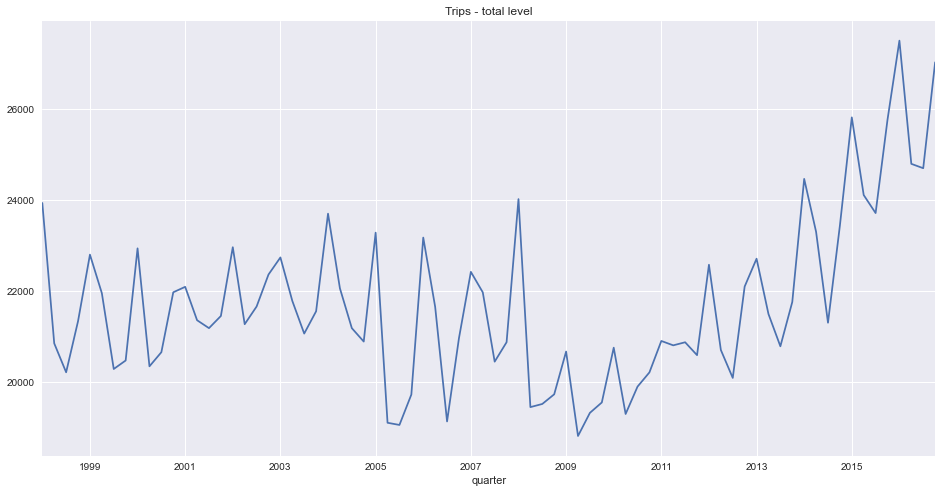

In [75]:
hierarchy_df["total"].plot(title="Trips - total level")

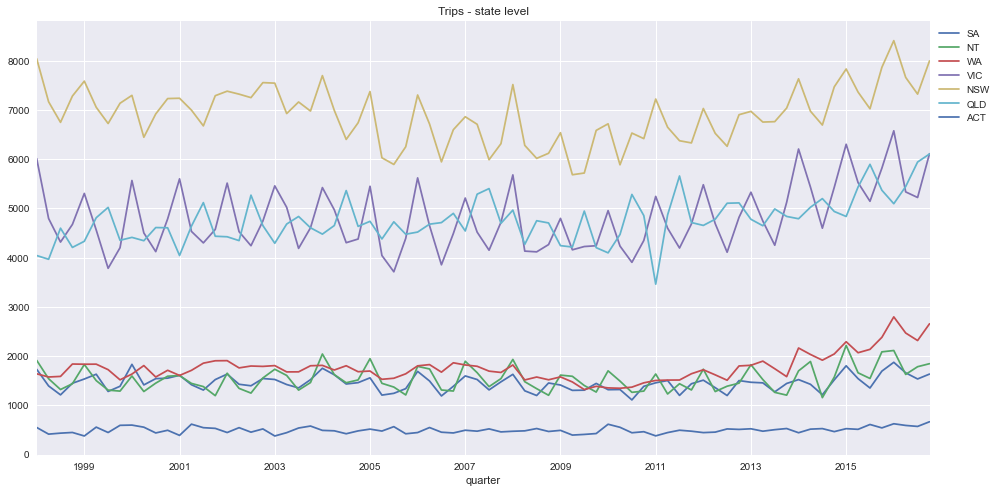

In [76]:
ax = hierarchy_df[hierarchy['total']].plot(title="Trips - state level")
ax.legend(bbox_to_anchor=(1.0, 1.0))

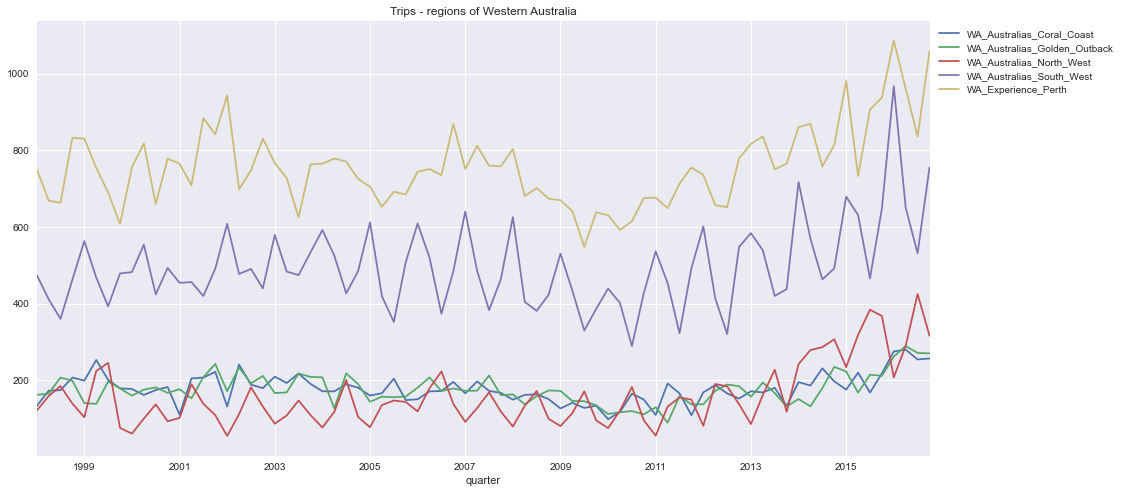

In [77]:
ax = hierarchy_df[hierarchy['WA']].plot(title="Trips - regions of Western Australia")
ax.legend(bbox_to_anchor=(1.0, 1.0))

In [78]:
#The top down approach

In [88]:
model_td_arima = hts.HTSRegressor(model='auto_arima', revision_method='AHP', n_jobs=0)
model_td_arima = model_td_arima.fit(hierarchy_df, hierarchy)
pred_td_arima = model_td_arima.predict(steps_ahead=4)

Fitting models: 100%|██████████| 85/85 [00:00<00:00, 149.13it/s]


In [89]:
def plot_results(pred_df, source_df, cols_to_plot):
    """
    Helper function used for displaying the predictions vs. actuals for the indicated columns
    """

    if type(cols_to_plot) == str:
        cols_to_plot = list(cols_to_plot)

    for col in cols_to_plot:
        fig, ax = plt.subplots()
        pred_df[col].plot(ax=ax, label="Predicted")
        source_df[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("Trips");

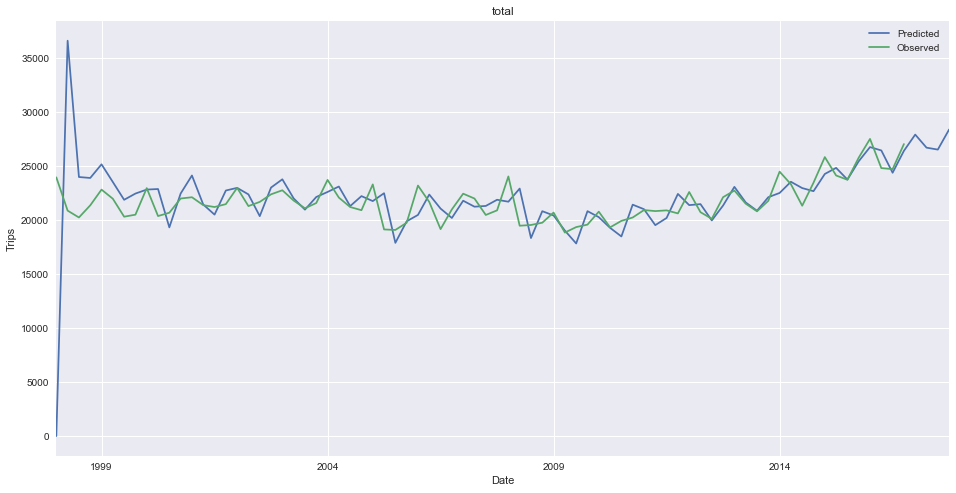

In [90]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['total'])

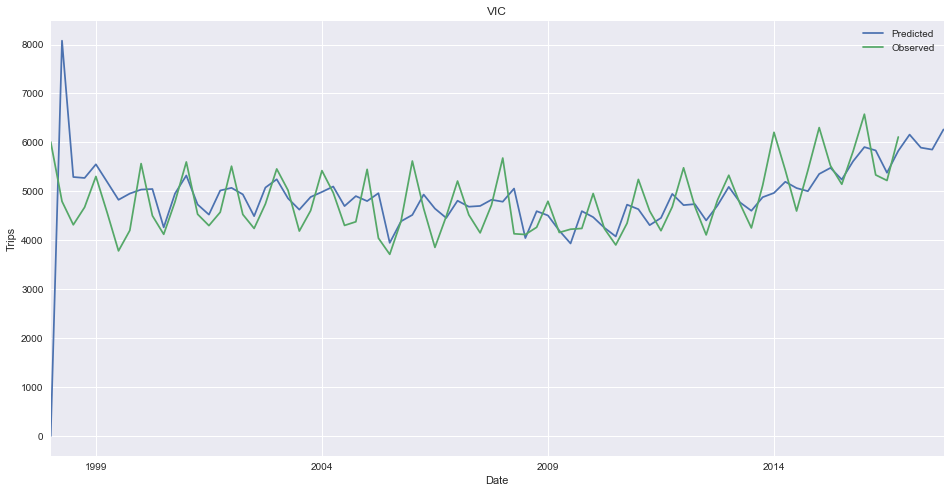

In [101]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['VIC'])

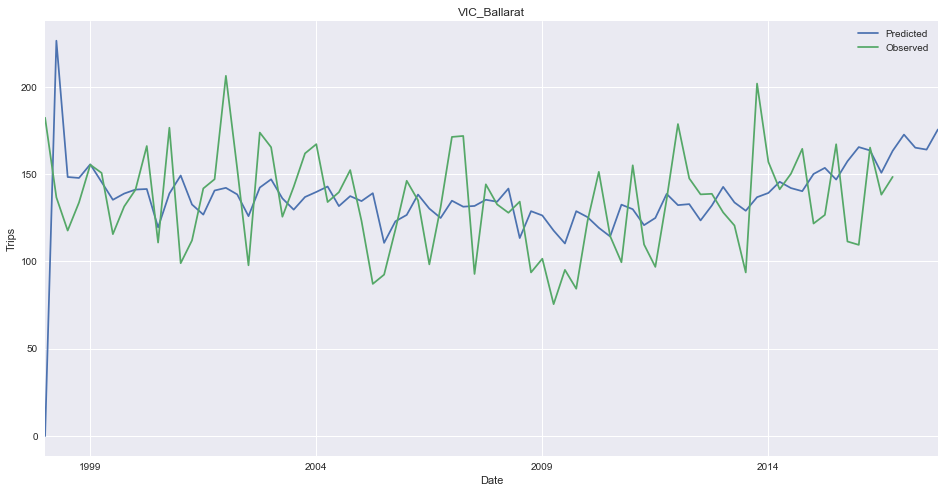

In [99]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['VIC_Ballarat'])

In [102]:
model_ols_arima = hts.HTSRegressor(model='auto_arima', revision_method='OLS', n_jobs=0)
model_ols_arima = model_ols_arima.fit(hierarchy_df, hierarchy)
pred_ols_arima = model_ols_arima.predict(steps_ahead=4)

Fitting models: 100%|██████████| 85/85 [00:00<00:00, 157.15it/s]


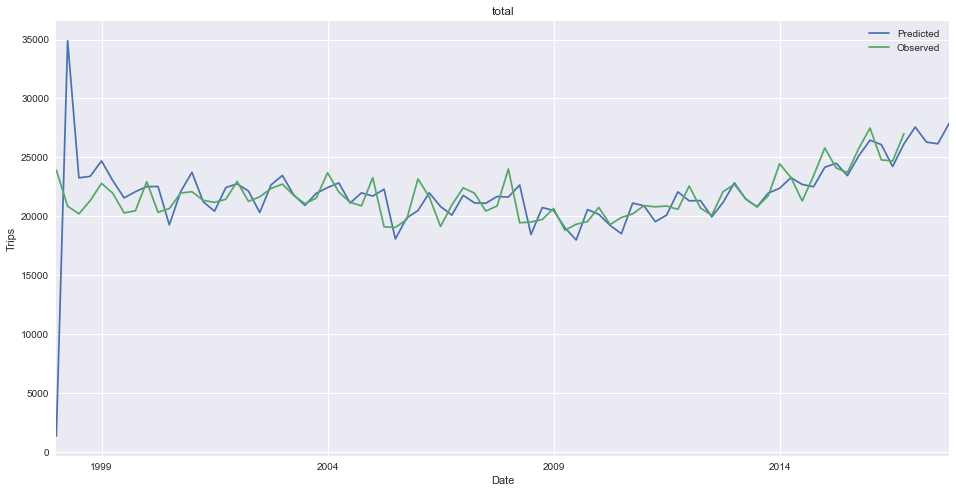

In [103]:
plot_results(pred_ols_arima, hierarchy_df, cols_to_plot=['total'])

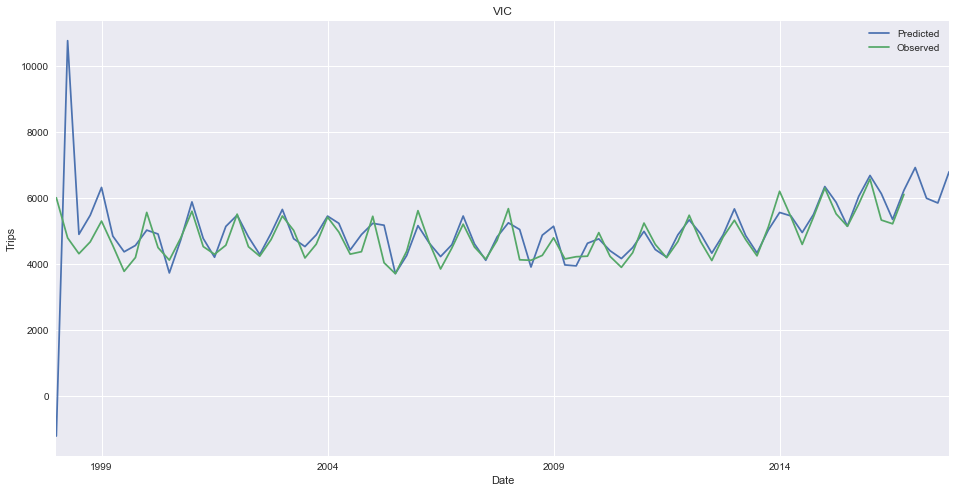

In [107]:
plot_results(pred_ols_arima, hierarchy_df, cols_to_plot=['VIC'])

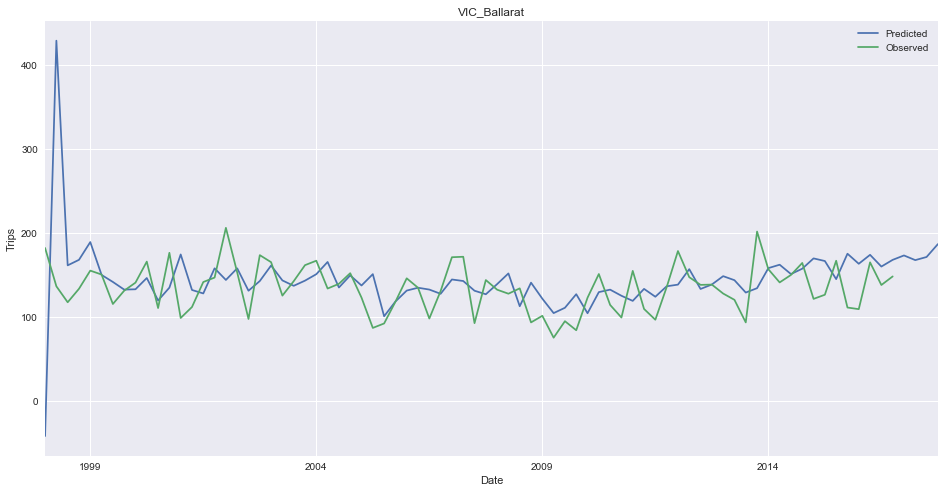

In [105]:
plot_results(pred_ols_arima, hierarchy_df, cols_to_plot=['VIC_Ballarat'])